In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.

import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches

%matplotlib inline

In [2]:
data = pd.read_csv('file path')

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.shape

(10841, 13)

In [6]:
data.dropna(how ='any', inplace = True)

In [8]:
data.shape

(9360, 13)

In [9]:
data.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

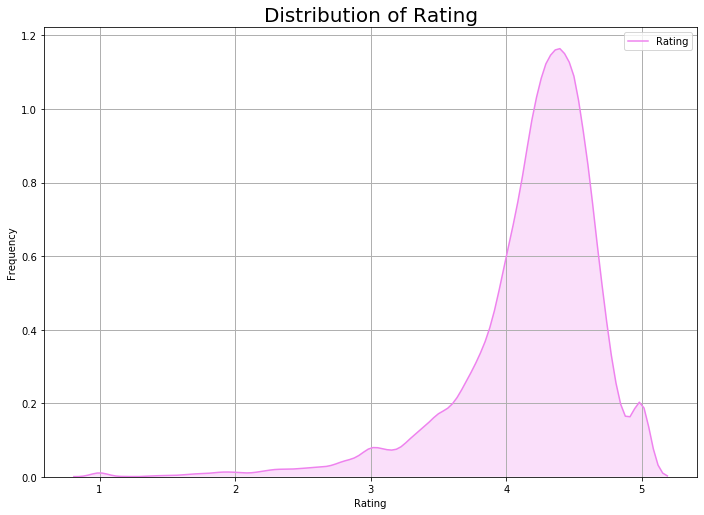

In [10]:
# rating distibution 
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data.Rating, color="violet", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
plt.grid( linestyle='-', linewidth=1)
plt.savefig('Rating_dist.png')

In [109]:
print( len(data['Category'].unique()) , "categories")

print("\n", data['Category'].unique())

33 categories

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [110]:
data.Category.describe()

count       9360
unique        33
top       FAMILY
freq        1746
Name: Category, dtype: object

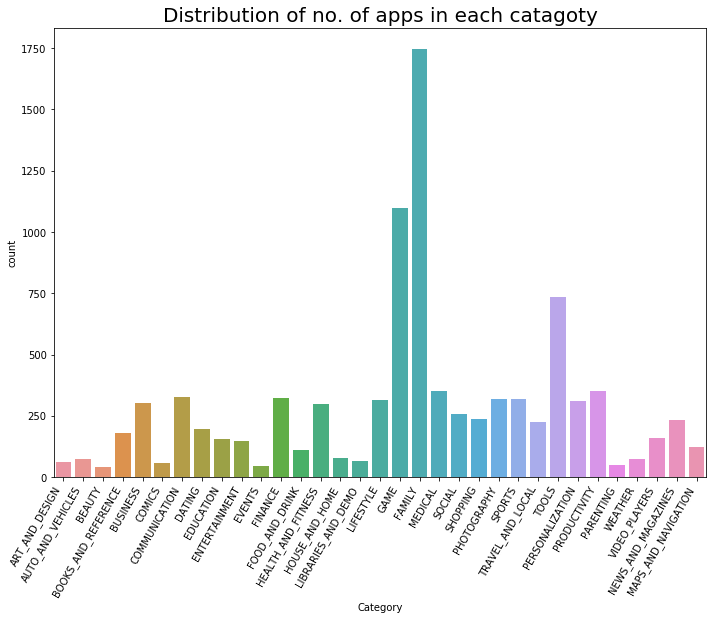

In [111]:
g = sns.countplot(x="Category",data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=60, ha="right")
g 
plt.title('Distribution of no. of apps in each catagoty',size = 20)
plt.savefig('catagory_dist.png')

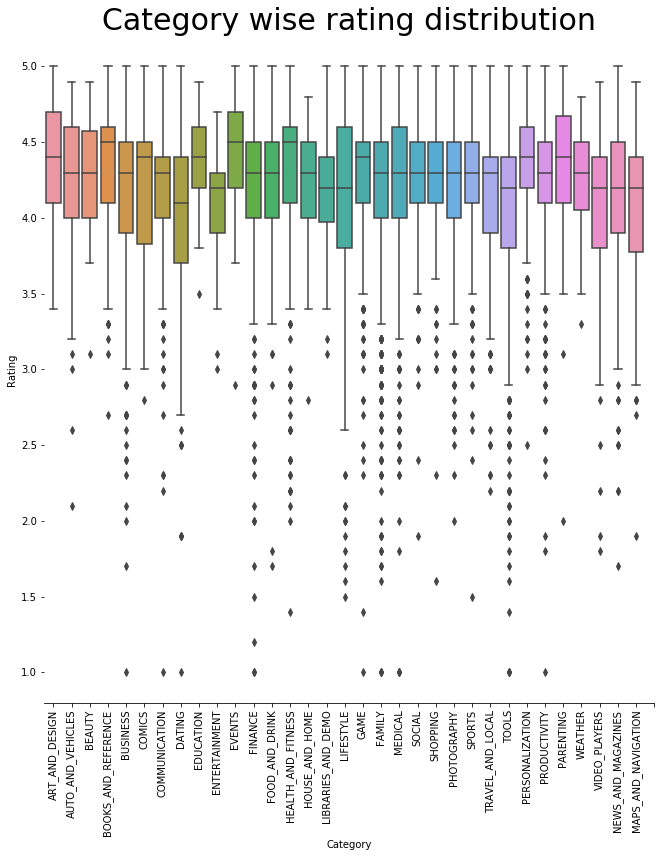

In [112]:
g = sns.catplot(x="Category",y="Rating",data=data, kind="box", height = 10)
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Category wise rating distribution',size = 30)
plt.savefig('rating_vs_catagory.png',  bbox_inches = 'tight')

In [113]:
#convert Reviews to int type
data['Reviews'] = data['Reviews'].apply(lambda x: int(x))

In [114]:
data.Reviews.describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

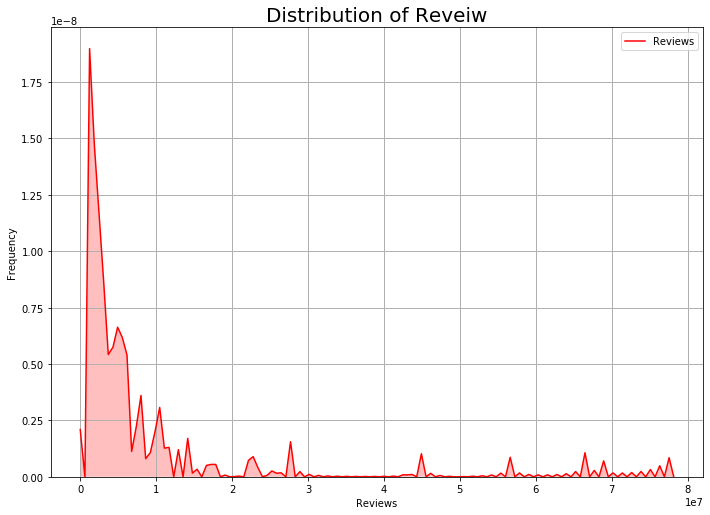

In [115]:
# rating distibution 
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data.Reviews, color="red", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 20)
plt.grid( linestyle='-', linewidth=1)
plt.savefig('review_dist.png',  bbox_inches = 'tight')

<Figure size 720x720 with 0 Axes>

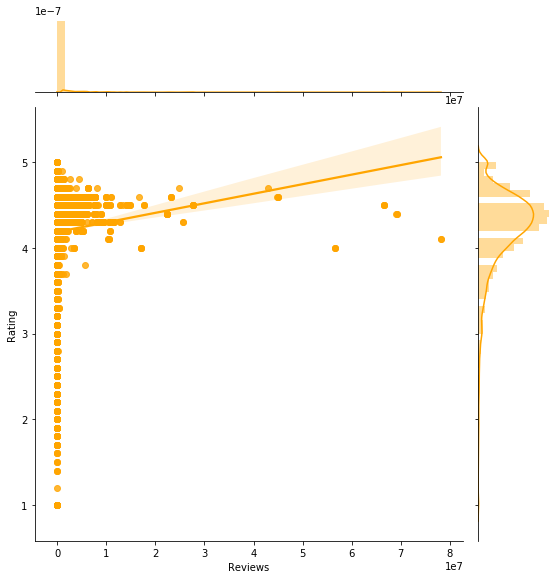

In [116]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Reviews", y="Rating",color = 'orange', data=data,size = 8, kind = 'reg')
plt.savefig('rating_vs_rev.png',  bbox_inches = 'tight')

In [117]:
from scipy.stats import linregress
linregress(data.Rating, data.Reviews)

LinregressResult(slope=415863.289639851, intercept=-1228854.6715804846, rvalue=0.06813270883720689, pvalue=4.1553678721522156e-11, stderr=62949.610819097055)

In [119]:
data['Size'].replace('Varies with device', np.nan, inplace = True )

In [120]:
data.Size = (data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

In [121]:
data['Size'].fillna(data.groupby('Category')['Size'].transform('mean'),inplace = True) #I decide to fill "Varies with device" with mean of size in each category

<Figure size 720x720 with 0 Axes>

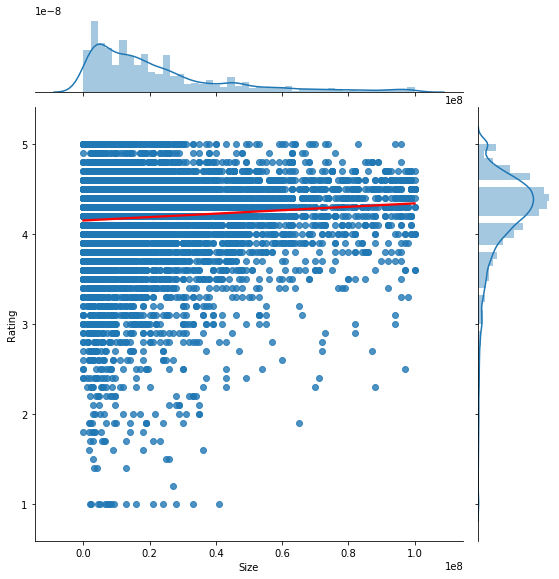

In [122]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Size", y="Rating", data=data, size = 8,kind = 'reg')
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
plt.savefig('size_vs_rating.png',  bbox_inches = 'tight')

In [123]:
from scipy.stats import linregress
linregress(data.Rating, data.Size)

LinregressResult(slope=3368003.4607491973, intercept=8363274.16398461, rvalue=0.08003896875633525, pvalue=8.838054304639217e-15, stderr=433594.687677379)

In [124]:
data.Installs = data.Installs.apply(lambda x: x.replace(',',''))
data.Installs = data.Installs.apply(lambda x: x.replace('+',''))
data.Installs = data.Installs.apply(lambda x: int(x))

In [125]:
Sorted_value = sorted(list(data['Installs'].unique()))
data['Installs'].replace(Sorted_value,range(0,len(Sorted_value),1), inplace = True )

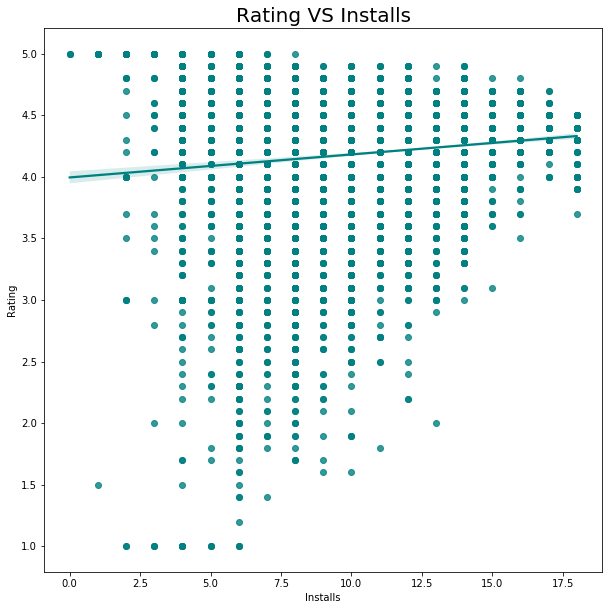

In [126]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=data);
plt.title('Rating VS Installs',size = 20)
plt.savefig('rating_vs_installs.png',  bbox_inches = 'tight')

In [127]:
from scipy.stats import linregress
linregress(data.Rating, data.Installs)

LinregressResult(slope=0.7805151415746914, intercept=7.292416678550431, rvalue=0.12066710901569613, pvalue=1.062110733736673e-31, stderr=0.06637673347837135)

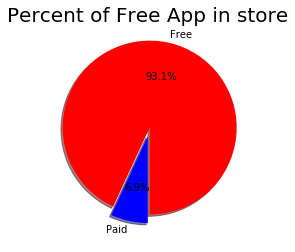

In [13]:
# Data to plot
labels =data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)


colors = ["red","blue"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 4,4
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free App in store',size = 20)
plt.savefig('pie_plot.png',  bbox_inches = 'tight')

In [129]:
data['Free'] = data['Type'].map(lambda s :1  if s =='Free' else 0)
data.drop(['Type'], axis=1, inplace=True)

In [130]:
data.Price = data.Price.apply(lambda x: x.replace('$',''))
data['Price'] = data['Price'].apply(lambda x: float(x))

In [131]:
data['Price'].max()

400.0

In [132]:
data[data['Price'] == 400]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,8,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,0


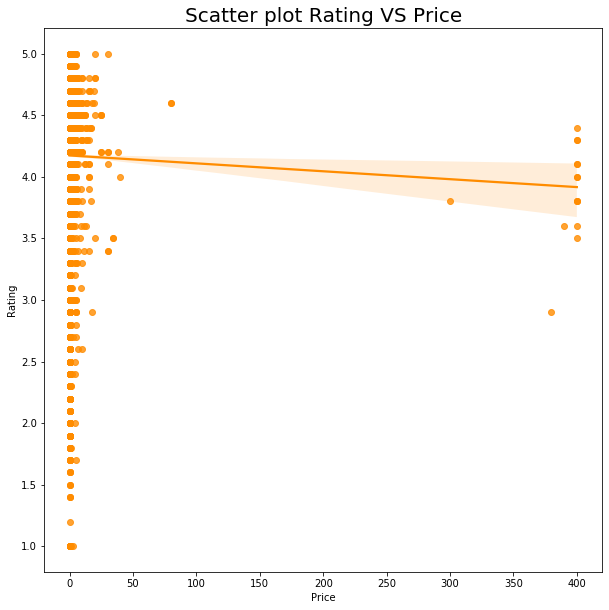

In [133]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=data[data['Reviews']<1000000]);
plt.title('Scatter plot Rating VS Price',size = 20)
plt.savefig('rating_vs_price.png',  bbox_inches = 'tight')

In [134]:
from scipy.stats import linregress
linregress(data.Rating, data.Price)

LinregressResult(slope=-0.6730590731447524, intercept=3.782633180585283, rvalue=-0.02191949833499103, pvalue=0.03395385444635659, stderr=0.3173413725074215)

In [135]:
data.loc[ data['Price'] == 0, 'PriceBand'] = '0 Free'
data.loc[(data['Price'] > 0) & (data['Price'] <= 0.99), 'PriceBand'] = '1 cheap'
data.loc[(data['Price'] > 0.99) & (data['Price'] <= 2.99), 'PriceBand']   = '2 not cheap'
data.loc[(data['Price'] > 2.99) & (data['Price'] <= 4.99), 'PriceBand']   = '3 normal'
data.loc[(data['Price'] > 4.99) & (data['Price'] <= 14.99), 'PriceBand']   = '4 expensive'
data.loc[(data['Price'] > 14.99) & (data['Price'] <= 29.99), 'PriceBand']   = '5 too expensive'
data.loc[(data['Price'] > 29.99), 'PriceBand']  = '6 very much expensive'

In [136]:
data[['PriceBand', 'Rating']].groupby(['PriceBand'], as_index=False).mean()

,PriceBand,Rating
0,0 Free,4.186288
1,1 cheap,4.300943
2,2 not cheap,4.292975
3,3 normal,4.250318
4,4 expensive,4.269149
5,5 too expensive,4.252000
6,6 very much expensive,3.923810


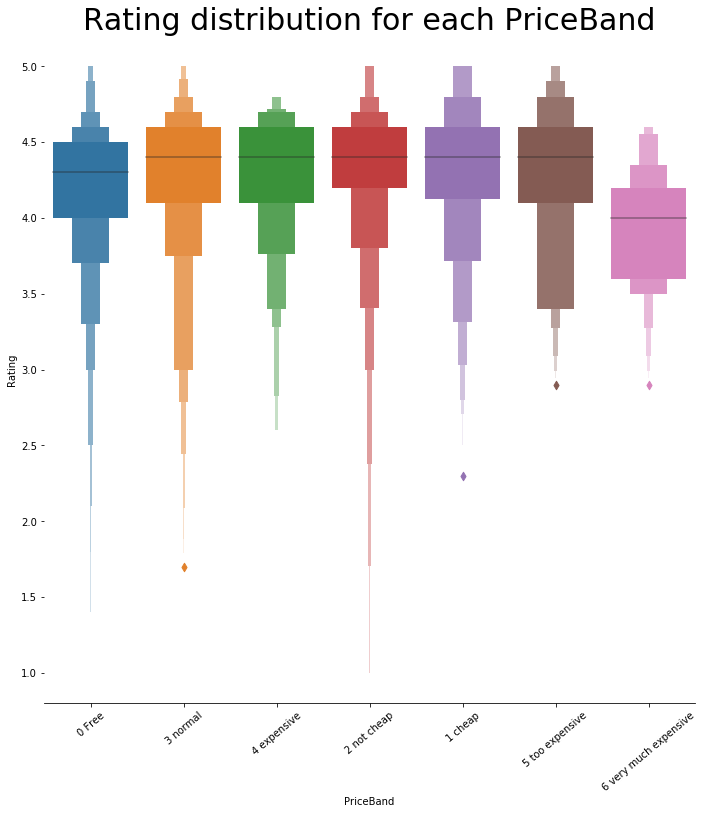

In [137]:
g = sns.catplot(x="PriceBand",y="Rating",data=data, kind="boxen", height = 10 )
g.despine(left=True)
#sns.set(font_scale = 1.7)
g.set_xticklabels(rotation=40)
g = g.set_ylabels("Rating")
plt.title('Rating distribution for each PriceBand',size = 30)
plt.savefig('box_plot_rating_vs_price.png',  bbox_inches = 'tight')

Price are not effect to rating ,but if it is very expensive, it might get low rating

In [138]:
import random

def generate_color():
    color = '#{:02x}{:02x}{:02x}'.format(*map(lambda x: random.randint(0, 255), range(3)))
    return color

In [139]:
# Create palette for categories

flatui = []
for i in range(0,len(data['Category'].unique()),1):
    flatui.append(generate_color())

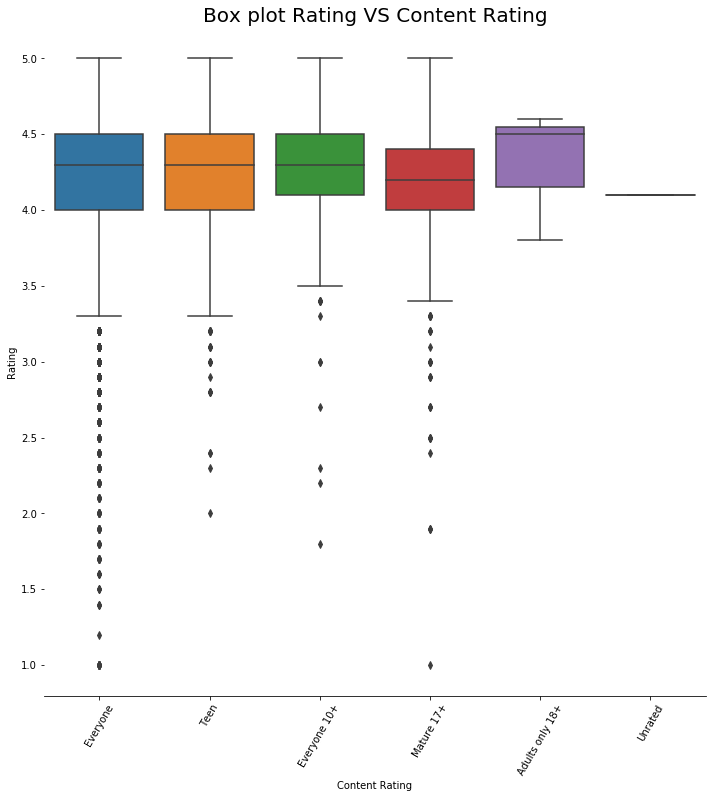

In [141]:
g = sns.catplot(x="Content Rating",y="Rating",data=data, kind="box", height = 10)
g.despine(left=True)
g.set_xticklabels(rotation=60)
g = g.set_ylabels("Rating")
plt.title('Box plot Rating VS Content Rating',size = 20)
plt.savefig('raing_vs_content_rating.png',  bbox_inches = 'tight')

Content Rating not effect too much to rating, 
but in Mature applications ,look like they get lower rating than other.

In [142]:
data[data['Content Rating']=='Unrated']

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free,PriceBand
8266,DC Universe Online Map,TOOLS,4.1,1186,6400000.0,9,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up,1,0 Free


In [143]:
data = data[data['Content Rating'] != 'Unrated'] # dropping the one data of unrated catagory

In [144]:
print( len(data['Genres'].unique()) , "genres")
print("\n", data['Genres'].unique())

115 genres

 ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education;Education'
 'Education' 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain Games' 'Educati

Many genre contain only few record, it may make a bias.
Then, I decide to group it to bigger genre by ignore sub-genre (after " ; " sign)

In [145]:
data['Genres'] = data['Genres'].str.split(';').str[0]

In [146]:
print( len(data['Genres'].unique()) , "genres")

print("\n", data['Genres'].unique())

48 genres

 ['Art & Design' 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business'
 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Adventure' 'Arcade' 'Casual' 'Card'
 'Action' 'Strategy' 'Puzzle' 'Sports' 'Music' 'Word' 'Racing'
 'Simulation' 'Board' 'Trivia' 'Role Playing' 'Educational'
 'Music & Audio' 'Video Players & Editors' 'Medical' 'Social' 'Shopping'
 'Photography' 'Travel & Local' 'Tools' 'Personalization' 'Productivity'
 'Parenting' 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino']


In [147]:
data['Genres'].replace('Music & Audio', 'Music',inplace = True)

In [148]:
data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().describe()

,Rating
count,47.000000
mean,4.210662
std,0.104405
min,3.970769
25%,4.132039
50%,4.198246
75%,4.282529
max,4.435556


In [149]:
data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').head(1)

,Genres,Rating
14,Dating,3.970769


In [150]:
data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').tail(1)

,Genres,Rating
18,Events,4.435556


Observing from Standard Deviation, seem like genre is not effect too much to rating.
The lowest of an average rating on genres (Dating) is 3.97 
while the highest (Events) is 4.43

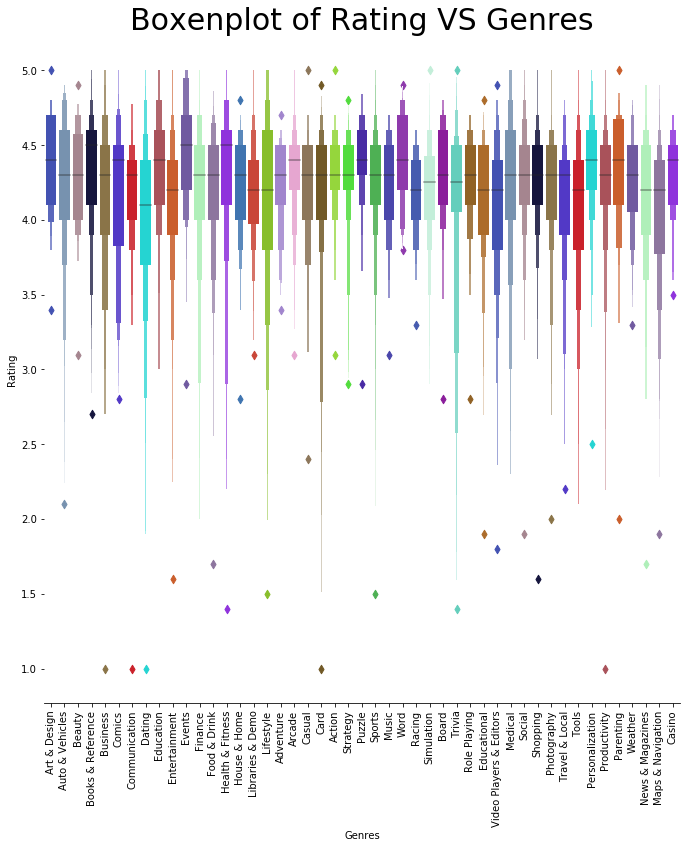

In [151]:
g = sns.catplot(x="Genres",y="Rating",data=data, kind="boxen", height = 10, palette = flatui )
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxenplot of Rating VS Genres',size = 30)
plt.savefig('rating_vs_genres.png',  bbox_inches = 'tight')

In [152]:
data['Last Updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10834       June 18, 2017
10836       July 25, 2017
10837        July 6, 2018
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 9359, dtype: object

In [153]:
from datetime import datetime as dt
data['Last Updated'] = data['Last Updated'].map(lambda s :dt.strptime(s, "%B %d, %Y"))

In [154]:
data['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10834   2017-06-18
10836   2017-07-25
10837   2018-07-06
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9359, dtype: datetime64[ns]

In [155]:
data['Last Updated'].describe()

count                    9359
unique                   1298
top       2018-08-03 00:00:00
freq                      319
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: Last Updated, dtype: object

In [156]:
data['Days'] = (data['Last Updated'].max() -  data['Last Updated']).dt.days

In [157]:
data.Days

0         213
1         205
2           7
3          61
4          49
         ... 
10834     416
10836     379
10837      33
10839    1297
10840      14
Name: Days, Length: 9359, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'ax_joint'

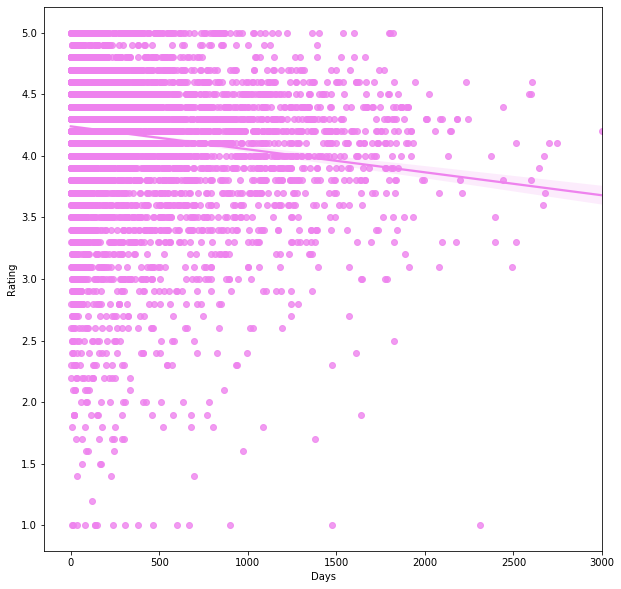

In [159]:
plt.figure(figsize = (10,10))
g =sns.regplot(x="Days", y="Rating", color = 'violet',data=data )
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
plt.title('Rating  VS Last Update( days ago )',size = 20)

In [158]:
from scipy.stats import linregress
linregress(data.Rating, data.Days)

LinregressResult(slope=-109.84414795382969, intercept=711.6829458756993, rvalue=-0.14308070164141096, pvalue=5.379739973034781e-44, stderr=7.854814924760468)

In [163]:
import pickle
file = open('path','wb')
pickle.dump(data,file)

In [1]:
import pickle
file = open('path','rb')
clean_data = pickle.load(file)

In [6]:
clean_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free,PriceBand,Days
10834,FR Calculator,FAMILY,4.0,7,2600000.0,5,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up,1,0 Free,416
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,7,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,1,0 Free,379
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,4,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,1,0 Free,33
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,14377092.5,6,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,1,0 Free,1297
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000000.0,14,0.0,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device,1,0 Free,14
